<a href="https://colab.research.google.com/github/maab2198/applied_ds_python/blob/master/C1_M1W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to Data Science in Python
##Week 3: Advanced Python Pandas

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "drive/My Drive/Colab Notebooks/C1_M1Files/"

# Merging Dataframes


In [0]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [0]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [0]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [0]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [0]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [0]:

staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


###Join 
Full Outher Join == Union  
Left Join == returns all records from the left table, and the matched records from the right table  
Inner Join == intersection  


In [0]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [0]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


list all of the staff + their student info

In [0]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [0]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [0]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [0]:
student_df

,Name,School
0,James,Business
1,Mike,Law
2,Sally,Engineering


In [0]:
staff_df

,Name,Role
0,Kelly,Director of HR
1,Sally,Course liasion
2,James,Grader


In [0]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(student_df,staff_df,  how='outer', left_on='Name', right_on='Name')

# _x left
# _y right

,Name,School,Location_x,Role,Location_y
0,James,Business,1024 Billiard Avenue,Grader,Washington Avenue
1,Sally,Engineering,512 Wilson Crescent,Course liasion,Washington Avenue


In [0]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='outer', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Kelly,Desjardins,Director of HR,NaN
1,Sally,Brooks,Course liasion,Engineering
2,James,Wilde,Grader,NaN
3,James,Hammond,NaN,Business
4,Mike,Smith,NaN,Law


# Idiomatic Pandas: Making Code Pandorable

In [0]:
import pandas as pd
df = pd.read_csv(path + 'census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,4801108,4816089,4830533,4846411,4858979,5034,15947,14981,14444,15878,12568,14226,59689,59062,57938,58334,58305,11089,48811,48357,50843,50228,50330,3137,10878,10705,7095,8106,7975,1357,...,677,-573,1135,116185,116212,115560,115666,116963,119088,119599,12.453020,12.282581,12.012080,12.056286,12.014973,10.183524,10.056360,10.541099,10.380963,10.371556,2.269496,2.226220,1.470981,1.675322,1.643417,1.027720,1.019840,1.002216,1.142716,1.179963,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [0]:
#Tom Osberger

Method chaining

In [0]:
(df.where(df['SUMLEV']==50)
    .dropna() #removing missing values
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50.0,3.0,6.0,1.0,1.0,Alabama,Autauga County,54571.0,54571.0,54660.0,55253.0,55175.0,55038.0,55290.0,55347.0,89.0,593.0,-78.0,-137.0,252.0,57.0,151.0,636.0,615.0,574.0,623.0,600.0,152.0,507.0,558.0,583.0,504.0,467.0,-1.0,129.0,57.0,-9.0,119.0,133.0,33.0,...,22.0,-10.0,45.0,455.0,455.0,455.0,455.0,455.0,455.0,455.0,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50.0,3.0,6.0,1.0,3.0,Alabama,Baldwin County,182265.0,182265.0,183193.0,186659.0,190396.0,195126.0,199713.0,203709.0,928.0,3466.0,3737.0,4730.0,4587.0,3996.0,517.0,2187.0,2092.0,2160.0,2186.0,2240.0,532.0,1825.0,1879.0,1902.0,2044.0,1992.0,-15.0,362.0,213.0,258.0,142.0,248.0,69.0,...,91.0,434.0,58.0,2307.0,2307.0,2307.0,2249.0,2304.0,2308.0,2309.0,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50.0,3.0,6.0,1.0,5.0,Alabama,Barbour County,27457.0,27457.0,27341.0,27226.0,27159.0,26973.0,26815.0,26489.0,-116.0,-115.0,-67.0,-186.0,-158.0,-326.0,70.0,335.0,300.0,283.0,260.0,269.0,128.0,319.0,291.0,294.0,310.0,309.0,-58.0,16.0,9.0,-11.0,-50.0,-40.0,2.0,...,19.0,-1.0,-5.0,3193.0,3193.0,3382.0,3388.0,3389.0,3353.0,3352.0,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50.0,3.0,6.0,1.0,7.0,Alabama,Bibb County,22915.0,22919.0,22861.0,22733.0,22642.0,22512.0,22549.0,22583.0,-58.0,-128.0,-91.0,-130.0,37.0,34.0,44.0,266.0,245.0,259.0,247.0,253.0,34.0,278.0,237.0,281.0,211.0,223.0,10.0,-12.0,8.0,-22.0,36.0,30.0,2.0,...,14.0,-16.0,-21.0,2224.0,2224.0,2224.0,2224.0,2224.0,2233.0,2236.0,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50.0,3.0,6.0,1.0,9.0,Alabama,Blount County,57322.0,57322.0,57373.0,57711.0,57776.0,57734.0,57658.0,57673.0,51.0,338.0,65.0,-42.0,-76.0,15.0,183.0,744.0,710.0,646.0,618.0,603.0,133.0,570.0,592.0,585.0,589.0,590.0,50.0,174.0,118.0,61.0,29.0,13.0,5.0,...,-22.0,-14.0,53.0,489.0,489.0,489.0,489.0,489.0,489.0,489.0,12.929686,12.295756,11.185179,10.711314,10.456859,9.905808,10.252236,10.128993,10.208680,10.231421,3.023878,2.0435

In [0]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  ...  RNETMIG2014  RNETMIG2015
STNAME  CTYNAME                            ...                          
Alabama Autauga County         50       3  ...     2.592270    -2.187333
        Baldwin County         50       3  ...    20.317142    18.293499
        Barbour County         50       3  ...    -3.978583   -10.543299
        Bibb County            50       3  ...     0.754533     1.107861
        Blount County          50       3  ...    -1.577232    -0.884411
...                           ...     ...  ...          ...          ...
Wyoming Sweetwater County      50       4  ...   -14.075283   -14.070195
        Teton County           50       4  ...    16.308671     1.520747
        Uinta County           50       4  ...   -14.740608   -12.606351
        Washakie County        50       4  ...   -18.020168     1.441961
        Weston County          50       4  ...     1.533635     6.935294

[3142 rows x 98 columns]

In [0]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [0]:
df.apply(min_max, axis=1) #axis == apply  to rows 

min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

In [0]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  ...       max       min
STNAME  CTYNAME                            ...                    
Alabama Autauga County       50.0     3.0  ...   55347.0   54660.0
        Baldwin County       50.0     3.0  ...  203709.0  183193.0
        Barbour County       50.0     3.0  ...   27341.0   26489.0
        Bibb County          50.0     3.0  ...   22861.0   22512.0
        Blount County        50.0     3.0  ...   57776.0   57373.0
...                           ...     ...  ...       ...       ...
Wyoming Sweetwater County    50.0     4.0  ...   45162.0   43593.0
        Teton County         50.0     4.0  ...   23125.0   21297.0
        Uinta County         50.0     4.0  ...   21102.0   20822.0
        Washakie County      50.0     4.0  ...    8545.0    8316.0
        Weston County        50.0     4.0  ...    7234.0    7065.0

[3142 rows x 100 columns]

In [0]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

# Group by

In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv(path + 'census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,57711,57776,57734,57658,57673,51,338,65,-42,-76,15,183,744,710,646,618,603,133,570,592,585,589,590,50,174,118,61,29,13,5,...,-22,-14,53,489,489,489,489,489,489,489,12.929686,12.295756,11.185179,10.711314,10.456859,9.905808,10.252236,10.128993,10.208680,10.231421,3.023878,2.043520,1.056186,0.502634,0.225438,0.052136,0.329041,0.346290,0.485302,0.485559,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
%%timeit -n 10
i = 0
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

In [0]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

In [0]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,57711,57776,57734,57658,57673,51,338,65,-42,-76,15,183,744,710,646,618,603,133,570,592,585,589,590,50,174,118,61,29,13,5,...,-22,-14,53,489,489,489,489,489,489,489,12.929686,12.295756,11.185179,10.711314,10.456859,9.905808,10.252236,10.128993,10.208680,10.231421,3.023878,2.043520,1.056186,0.502634,0.225438,0.052136,0.329041,0.346290,0.485302,0.485559,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [0]:
# df["NAME"] = df["STNAME"]
# df = df.set_index('STNAME')


def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')
obj = df.groupby(fun)
obj.first() # return first element of every group

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,INTERNATIONALMIG2011,...,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,NAME
0,50,3,6,1,1,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,20,...,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,Alabama
1,50,1,1,23,1,Androscoggin County,107702,107702,107706,107403,107558,107365,107408,107233,4,-303,155,-193,43,-175,369,1340,1318,1287,1254,1233,251,1018,1021,1049,1009,1006,118,322,297,238,245,227,21,107,...,-44,7,2760,2760,2760,2760,2770,2779,2781,12.458800,12.262690,11.976382,11.677445,11.488951,9.464969,9.499398,9.761636,9.395967,9.373792,2.993831,2.763292,2.214747,2.281479,2.115160,0.994844,1.004833,1.163207,1.340951,1.332457,-6.480436,-2.344611,-5.611312,-2.812272,-5.143472,-5.485591,-1.339778,-4.448105,-1.471321,-3.811015,Maine
2,50,1,1,44,1,Bristol County,49875,49875,49864,49273,49223,49254,49047,49084,-11,-591,-50,31,-207,37,106,361,344,346,346,346,145,472,444,482,525,524,-39,-111,-100,-136,-179,-178,7,19,...,-25,37,3242,3242,2661,2686,2711,2751,2778,7.282851,6.985055,7.027022,7.039603,7.051798,9.522176,9.015595,9.789088,10.681478,10.679602,-2.239325,-2.030539,-2.762066,-3.641875,-3.627804,0.383308,0.588856,0.649898,0.793481,0.794856,-10.551056,0.487329,2.213715,-0.854518,2.832948,-10.167748,1.076186,2.863613,-0.061037,3.627804,Rhode Island


In [0]:
df = pd.read_csv(path + 'census.csv')
df = df[df['SUMLEV']==50]

In [0]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}) # return average scale for each group

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [0]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.min})

,CENSUS2010POP
STNAME,
Alabama,9045
Alaska,662
Arizona,8437
Arkansas,5368
California,1175
Colorado,699
Connecticut,118428
Delaware,162310
District of Columbia,601723


In [0]:
print(df.groupby('STNAME').apply(lambda df,a,b: sum(df[a] * df[b]), 'POPESTIMATE2010', 'POPESTIMATE2010').head())


STNAME
Alabama         1053187313885
Alaska           109223952103
Arizona        15925983807266
Arkansas         353240120090
California    138767537905511
dtype: int64


In [0]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

In [0]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [0]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


avg  ...             sum
                     POPESTIMATE2010  ... POPESTIMATE2011
STNAME                                ...                
Alabama                 71420.313433  ...         4801108
Alaska                  24621.413793  ...          722720
Arizona                427213.866667  ...         6468732
Arkansas                38965.253333  ...         2938538
California             643691.017241  ...        37700034
Colorado                78878.968750  ...         5119480
Connecticut            447464.625000  ...         3589759
Delaware               299930.333333  ...          907916
District of Columbia   605126.000000  ...          620472
Florida                281341.641791  ...        19105533
Georgia                 61090.905660  ...         9812280
Hawaii                 272796.000000  ...         1378227
Idaho                   35704.227273  ...         1584134
Illinois               125894.598039  ...        12861882
Indiana                 70549.891304  ...         6516845
Iowa                    30815.090909  ...         3065389
Kansas                  27226.895238  ...         2869917
Kentucky                36232.808333  ...         4367882
Louisiana               71014.859375  ...         4575381
Maine                   82980.937500  ...         1328257
Maryland               241183.708333  ...         5844171
Massachusetts          468931.142857  ...         6611797
Michigan               119004.445783  ...         9876589
Minnesota               61044.862069  ...         5348119
Mississippi             36223.365854  ...         2977999
Missouri                52139.582609  ...         6010587
Montana                 17690.053571  ...          997746
Nebraska                19677.688172  ...         1842383
Nevada                 159025.882353  ...         2718819
New Hampshire          131670.800000  ...         1318344
New Jersey             419232.428571  ...         8842934
New Mexico              62567.909091  ...         2078226
New York               312950.322581  ...        19523202
North Carolina          95589.790000  ...         9651025
North Dakota            12726.981132  ...          685326
Ohio                   131145.068182  ...        11545442
Oklahoma                48825.922078  ...         3786626
Oregon                 106610.333333  ...         3868509
Pennsylvania           189731.552239  ...        12745202
Rhode Island           210643.800000  ...         1051856
South Carolina         100780.304348  ...         4672733
South Dakota            12368.166667  ...          824289
Tennessee               66911.421053  ...         6398408
Texas                   99387.255906  ...        25654464
Utah                    95704.344828  ...         2816440
Vermont                 44713.142857  ...          626687
Virginia                60344.263158  ...         8110783
Washington             172898.974359  ...         6823229
West Virginia           33713.181818  ...         1854948
Wisconsin               79030.611111  ...         5709720
Wyoming                 24544.173913  ...          567768

[51 rows x 4 columns]

In [0]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


# Scales

Ratio scale:
• units are equally spaced
• mathematical operations of +-/* are all valid
• E.g. height and weight
Interval scale:
• units are equally spaced, but there is no true zero
Ordinal scale:
• the order of the units is important, but not evenly spaced.
• Letter grades such as A+, A are a good example
Nominal scale:
• categories of data, but the categories have no order with respect to one another.
• E.g. Teams of a sport.

![alt text](https://www.mymarketresearchmethods.com/wp-content/uploads/2016/05/summary-of-data-types-and-scales.png)

Nominal scale == categorical data

In [0]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [0]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

Ordinal scale ==> flag "ordered = True"

In [0]:
#Python 3 version 
grades = pd.Categorical(df['Grades'],categories= ['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],ordered=True)



excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [0]:
df['Grades'] = grades > 'C'
df['Grades'] 

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [0]:
s = pd.Series(pd.Categorical(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'], categories = ['Low','Medium','High'] ,ordered= True))
s


0       Low
1       Low
2      High
3    Medium
4       Low
5      High
6       Low
dtype: category
Categories (3, object): [Low < Medium < High]

In [0]:
df = pd.read_csv(path + 'census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

dummie var ==> Boolean variable

Interval data

In [0]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])
pd.cut(s,3)

0     (167.978, 175.333]
1     (175.333, 182.667]
2     (167.978, 175.333]
3       (182.667, 190.0]
4     (167.978, 175.333]
5       (182.667, 190.0]
6     (175.333, 182.667]
7     (175.333, 182.667]
8     (167.978, 175.333]
9     (167.978, 175.333]
10    (175.333, 182.667]
11    (175.333, 182.667]
12    (175.333, 182.667]
13    (167.978, 175.333]
dtype: category
Categories (3, interval[float64]): [(167.978, 175.333] < (175.333, 182.667] < (182.667, 190.0]]

In [0]:
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

# Pivot Tables

In [0]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv(path + 'cars.csv')

In [0]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [0]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [0]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=False)

mean                         ...       amin                    
Make    BMW CHEVROLET   FORD   KIA  ... MITSUBISHI NISSAN SMART  TESLA
YEAR                                ...                               
2012    NaN       NaN    NaN   NaN  ...       49.0   80.0   NaN    NaN
2013    NaN       NaN  107.0   NaN  ...       49.0   80.0  35.0  270.0
2014    NaN     104.0  107.0   NaN  ...       49.0   80.0  35.0  225.0
2015  125.0     104.0  107.0  81.0  ...       49.0   80.0  35.0  280.0
2016  125.0     104.0  107.0  81.0  ...       49.0   80.0  35.0  283.0

[5 rows x 16 columns]

In [0]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                         ...   amin                 
Make    BMW CHEVROLET   FORD   KIA  ... NISSAN SMART  TESLA All
YEAR                                ...                        
2012    NaN       NaN    NaN   NaN  ...   80.0   NaN    NaN  49
2013    NaN       NaN  107.0   NaN  ...   80.0  35.0  270.0  35
2014    NaN     104.0  107.0   NaN  ...   80.0  35.0  225.0  35
2015  125.0     104.0  107.0  81.0  ...   80.0  35.0  280.0  35
2016  125.0     104.0  107.0  81.0  ...   80.0  35.0  283.0  35
All   125.0     104.0  107.0  81.0  ...   80.0  35.0  225.0  35

[6 rows x 18 columns]

# Date Functionality in Pandas

In [0]:
import pandas as pd
import numpy as np

### Timestamp

In [0]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [0]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [0]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [0]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [0]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [0]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [0]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [0]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,94,91
"Aug 29, 2014",20,37
2015-06-26,42,24
7/12/16,76,73


In [0]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,94,91
2014-08-29,20,37
2015-06-26,42,24
2016-07-12,76,73


In [0]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [0]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [0]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [0]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [0]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,108,124
2016-10-16,111,125
2016-10-30,118,119
2016-11-13,122,115
2016-11-27,117,124
2016-12-11,117,122
2016-12-25,115,123
2017-01-08,118,127
2017-01-22,115,118


In [0]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [0]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,5.0,-3.0
2016-10-30,2.0,5.0
2016-11-13,6.0,-1.0
2016-11-27,-3.0,0.0
2016-12-11,-5.0,-5.0
2016-12-25,-4.0,5.0
2017-01-08,0.0,-1.0
2017-01-22,-4.0,-2.0


In [0]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.0,124.666667
2016-11-30,115.5,126.000000
2016-12-31,107.0,123.500000
2017-01-31,103.0,124.000000


In [0]:
df['2017']

,Count 1,Count 2
2017-01-08,105,125
2017-01-22,101,123


In [0]:
df['2016-12']

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126


In [0]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126
2017-01-08,105,125
2017-01-22,101,123


In [0]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,108,124
2016-10-09,108,124
2016-10-16,111,125
2016-10-23,111,125
2016-10-30,118,119
2016-11-06,118,119
2016-11-13,122,115
2016-11-20,122,115
2016-11-27,117,124
2016-12-04,117,124


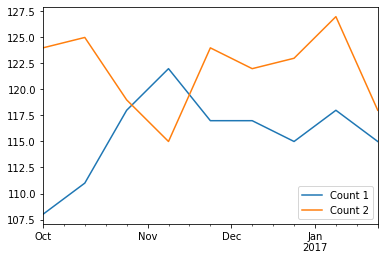

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()